# Word Embedding

Machine learning models only work with a numeric representation of input data. Suppose we have a training corpus with three  sentences:

- "the dog saw a cat", 
- "the dog chased the cat", 
- "the cat climbed a tree".

The corpus vocabulary has eight words, which are listed alphabetically as follows

|index | vocabulary | 
| --- | ---  |
|1 |a   | 
|2 |cat |
|3 |chased |
|4 |climbed |
|5 |dog |
|6 |saw |
|7 |the |
|8 |tree |

## Tokenization

The different units into which you can break down text are called tokens. The token can be a word (e.g. "cat"), or a phrase (e.g., "the cat", or "a cat"). Eventually, we will transform each token to a numeric vector.

In [41]:
from tensorflow.keras.preprocessing.text import Tokenizer

texts = ["the dog saw a cat",
         "the dog chased the cat",
         "the cat climbed a tree"]

tokenizer = Tokenizer()
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
# print("The count of words", tokenizer.word_counts)
print("The sequences generated from text are:", sequences)

The sequences generated from text are: [[1, 3, 5, 4, 2], [1, 3, 6, 1, 2], [1, 2, 7, 4, 8]]


The code provides an example of tokenization. It creates tokens for each of the 8 words in the vocabulary and assigns an integer to each token (e.g., "then" = 1 and "dog" = 3). As a result, each sentence is transformed into a sequence of numbers.

## One-hot encoding

One-hot encoding is the most common, most basic way to turn a token into a vector. It is a binary vector of the size of the vocabulary where the vector has 1 for the index of the word, and 0 elsewhere. For example, "cat" has index 2 in the alphabetical order of the vocabulary. Then, the one-hot encoding of the word "cat" can be
$$\underbrace{[0,1,0,0,0,0,0,0]}_{8}$$
and, the sentence "the dog saw a cat" can be represented as a $5 \times 8$ matrix

$$
\left[
\begin{matrix}
0,0,0,0,0,0,1,0 \\
0,0,0,0,1,0,0,0\\
0,0,0,0,0,1,0,0\\
1,0,0,0,0,0,0,0\\
0,1,0,0,0,0,0,0
\end{matrix} \right]
$$

since the sentence has 5 words and the corpus vocabulary has 8 words. recall that this is exactly how we reshaped labels when using ConvNet for MNIST data.

One-hot encoding has two drawbacks for natural language processing (NLP) tasks:

- The dimensionality of the vector space becomes very high and sparse because each vector has the size of the vocabulary.

- There is no connection between words with similar meanings. For example, it is impossible to know that "dog" and "cat" are both pets.

## Frequency Encoding

One-hot encoding is a binary vector of the size of the vocabulary where the vector is all zeros, but has 1 for the index of the word. 
We can also encode the sentence based on the frequency of each word's occurrence. Then, the sentence “the dog saw a cat” becomes an array

$$[4, 2, 1, 2, 3]$$

However, similar to one-hot encoding, this frequency-based encoding does not capture any relationships between words with similar meanings. Even worse, in our example, "dog" and "a" have the same frequency, making them indistinguishable from each other.

## Embedding

Word embeddings are a popular and powerful way to represent words as vectors. These word vectors capture the semantic meaning of words, allowing for more effective processing in natural language processing (NLP) tasks.

<img src="https://raw.githubusercontent.com/ming-zhao/ming-zhao.github.io/master/AIML_for_Business/figure/word_embedding.jpg" width="800">

Given input texts, a word embedding model constructs a numeric vector for each word, transforming the text into a numerical representation. Initially, words are often represented using basic methods like one-hot encoding. These vectors are then passed through an embedding model. This model, built from large corpora of text, functions as a complex mathematical system that performs extensive calculations to generate more informative word vectors. These vectors position words with similar meanings close to each other in the vector space, effectively capturing their semantic relationships.

Word embeddings are foundational in NLP, enabling advanced applications such as sentiment analysis, machine translation, and more. By capturing the nuances of language, word embeddings significantly enhance the performance of machine learning models in understanding and generating human language.

In [31]:
#| echo: false
# import nltk
# nltk.download('word2vec_sample')
import gensim
word2vec_sample = './model/pruned.word2vec.txt'
model = gensim.models.KeyedVectors.load_word2vec_format(word2vec_sample, binary=False)

Next, we will use a popular pre-trained embedding model, **word2vec**, to see how we can perform various operations with these vectors.

In word2vec, each word is converted into a vector of numbers. For example, the word "university" might be represented as a 300-dimensional vector, meaning it has 300 numbers associated with it. These numbers capture various aspects of the word's meaning and context. The example below shows the first 4 numbers in the vector.

In [53]:
#| code-fold: false
model['university'][:4]

array([-0.0604623, -0.0463157,  0.0678263,  0.114723 ], dtype=float32)

### Exploring Word Similarity

One of the cool things about word embeddings is that we can measure how similar two words are by looking at the distance between their vectors. Words with similar meanings will have vectors that are close to each other.

For instance, using the word2vec model, we can find the top 3 words most similar to "university" are: "universities", "faculty", "undergraduate". The number after each word quantifies the probability of the similarity.

In [48]:
#| code-fold: false
model.most_similar(positive=['university'], topn = 3)

[('universities', 0.7003918290138245),
 ('faculty', 0.6780907511711121),
 ('undergraduate', 0.6587096452713013)]

### Finding the Odd Word Out

Word embeddings can also help us find a word that doesn't fit in a list of words. For example, given the list ["apple," "banana," "car," "orange"], the word "car" would be identified as the odd one out because it is not a fruit.

In [50]:
#| code-fold: false
model.doesnt_match(["apple", "banana", "car", "orange"])

'car'

In [34]:
#| code-fold: false
model.doesnt_match(['breakfast', 'cereal', 'dinner', 'lunch'])

'cereal'

### Performing Mathematical Operations
Another interesting feature of word embeddings is that we can perform mathematical operations with the vectors to find relationships between words. Here are two examples:

> Word Analogy: "woman" + "king" - "man" = "queen"

This operation finds that the relationship between "woman" and "man" is similar to the relationship between "queen" and "king."

> Geographic Analogy: "Paris" + "Germany" - "Berlin" = "France"

This operation shows that the relationship between "Paris" and "Berlin" is similar to the relationship between "France" and "Germany."

In [56]:
#| code-fold: false
model.most_similar(positive=['woman','king'], negative=['man'], topn = 1)

[('queen', 0.7118193507194519)]

In [57]:
#| code-fold: false
model.most_similar(positive=['Paris','Germany'], negative=['Berlin'], topn = 1)

[('France', 0.7884091138839722)]

Word embeddings like word2vec provide a powerful way to represent words and their meanings in a numerical form. This allows us to perform various operations to understand word relationships, find similarities, and even solve word analogies. These capabilities make word embeddings an essential tool in natural language processing and machine learning.

# Applications

## Sentiment Analysis of IMDB Movie Reviews

The IMDB dataset is a commonly used dataset for machine learning tutorials related to text and language. It contains 50,000 movie reviews, with 25,000 in the training set and 25,000 in the testing set, collected from IMDB. Each review in the dataset has been labeled with a binary sentiment: positive (1) or negative (0). The following code loads the IMDB data:
```python
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
```
The following code snippet shows the 11th to 15th words in the dictionary of this dataset:

In [64]:
from keras.datasets import imdb

max_features = 10000
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

print("Example of dictionary:\n", dict(sorted(reverse_word_index.items())[10:15]))

Example of dictionary:
 {11: 'this', 12: 'that', 13: 'was', 14: 'as', 15: 'for'}


The raw data contains the text of each movie review. The following code snippet shows the first review in the training data, which contains 218 words and has a positive sentiment:

In [70]:
#| output: asis

def show_review(index):
    decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in x_train[index]])
    print('Review:', decoded_review)
    print('\n')
    print('Number of words:{}'.format(len(decoded_review.split())))
    print('\nsentiment:', y_train[0])
    # print('Indices for all ?s:', [x_train[index][i] for i, w in enumerate(decoded_review.split()) if w == '?'])
show_review(0)
# print("Decode review x_train[0][:10]]:\n",
#       ' '.join([reverse_word_index.get(i - 3, '?') for i in x_train[0][:10]]))

Review: ? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't

Next, we ask AI to help perform some basic exploratory data analysis. 

::: {.callout-tip collapse="false" title="Prompt"}

Using the IMDB dataset in Keras, we generate key statistics for both the training and test datasets. These statistics include:

- Number of reviews
  
- Proportion of positive reviews
  
- Proportion of negative reviews

- Number of words in positive reviews (show min/max/median)
  
- Number of words in negative reviews (show min/max/median)
  
Creates a table with one column for the training data and another column for the test data.

:::

In [60]:
import numpy as np
import pandas as pd
from tensorflow.keras.datasets import imdb

# Load the IMDB dataset
(train_data, train_labels), (test_data, test_labels) = imdb.load_data()

# Calculate key statistics for the training data
num_train_reviews = len(train_data)
num_test_reviews = len(test_data)

# Proportions of positive and negative reviews
proportion_positive_train = np.sum(train_labels) / num_train_reviews
proportion_negative_train = 1 - proportion_positive_train

proportion_positive_test = np.sum(test_labels) / num_test_reviews
proportion_negative_test = 1 - proportion_positive_test

# Number of words in positive/negative reviews
def word_counts(data, labels, positive=True):
    return [len(review) for review, label in zip(data, labels) if label == positive]

train_data_positive = word_counts(train_data, train_labels, positive=True)
train_data_negative = word_counts(train_data, train_labels, positive=False)
test_data_positive = word_counts(test_data, test_labels, positive=True)
test_data_negative = word_counts(test_data, test_labels, positive=False)

# Calculate min, median, max
def min_median_max(word_counts):
    return np.min(word_counts), np.median(word_counts), np.max(word_counts)

min_words_positive_train, median_words_positive_train, max_words_positive_train = min_median_max(train_data_positive)
min_words_negative_train, median_words_negative_train, max_words_negative_train = min_median_max(train_data_negative)

min_words_positive_test, median_words_positive_test, max_words_positive_test = min_median_max(test_data_positive)
min_words_negative_test, median_words_negative_test, max_words_negative_test = min_median_max(test_data_negative)

# Results
data = {
    "Statistics": [
        "Number of reviews", "Proportion of positive reviews", "Proportion of negative reviews",
        "Number of words in positive reviews (Min)", 
        "Number of words in positive reviews (Median)", "Number of words in positive reviews (Max)",
        "Number of words in negative reviews (Min)", 
        "Number of words in negative reviews (Median)", "Number of words in negative reviews (Max)"
    ],
    "Train set": [
        num_train_reviews, proportion_positive_train, proportion_negative_train,
        min_words_positive_train, median_words_positive_train, max_words_positive_train,
        min_words_negative_train, median_words_negative_train, max_words_negative_train
    ],
    "Test set": [
        num_test_reviews, proportion_positive_test, proportion_negative_test,
        min_words_positive_test, median_words_positive_test, max_words_positive_test,
        min_words_negative_test, median_words_negative_test, max_words_negative_test
    ]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Display the DataFrame
df

,Statistics,Train set,Test set
0,Number of reviews,25000.0,25000.0
1,Proportion of positive reviews,0.5,0.5
2,Proportion of negative reviews,0.5,0.5
3,Number of words in positive reviews (Min),13.0,10.0
4,Number of words in positive reviews (Median),178.0,172.0
5,Number of words in positive reviews (Max),2494.0,2315.0
6,Number of words in negative reviews (Min),11.0,7.0
7,Number of words in negative reviews (Median),179.0,176.0
8,Number of words in negative reviews (Max),1571.0,1095.0


The reviews are equally split between positive and negative reviews for both sets. We can see some differences between positive and negative reviews, especially the minimum and maximum number of words per review. Besides understanding the dataset, the reason for looking at some of these key summary statistics is to determine whether we can engineer certain numeric features and build a simple logistic regression or tree-based classifier for sentiment analysis.

::: {.callout-tip collapse="false" title="Prompt"}

Generate histogram of word count per review for positive sentiment and negative sentiment in the training data.

:::

In that vein, let’s examine the distribution of the number of words per review, comparing positive and negative sentiments. Are there any differences in the number of words for positive and negative reviews? And if so, are negative reviews usually longer or shorter than positive reviews? We can answer these questions by looking at @fig-wdcnt. 

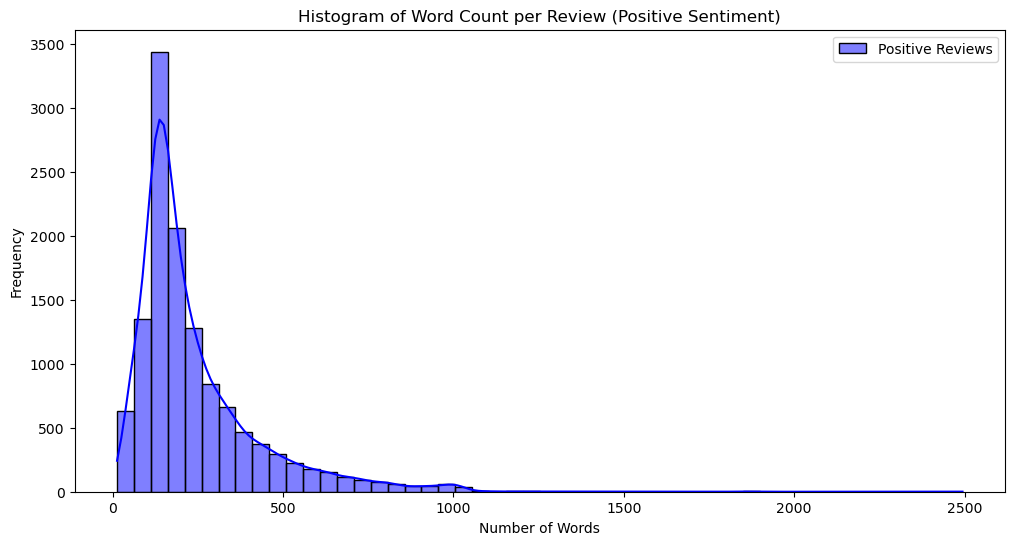

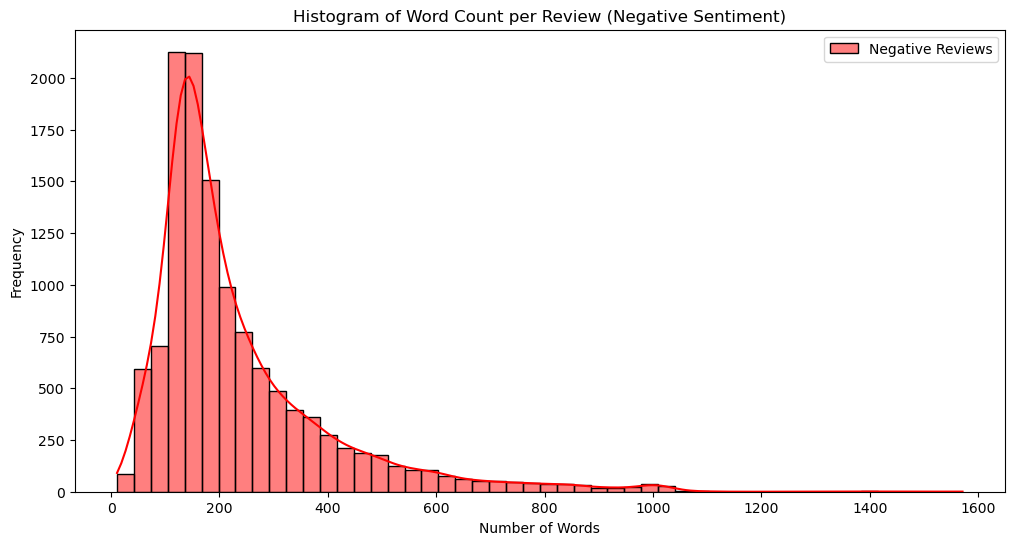

In [62]:
#| label: fig-wdcnt
#| echo: true
#| fig-cap: "Historgram of words count"
#| fig-subcap: 
#|    - "positive sentiment"
#|    - "negative sentiment"

import numpy as np
from tensorflow.keras.datasets import imdb
import matplotlib.pyplot as plt
import seaborn as sns

# Load the IMDB dataset
(train_data, train_labels), _ = imdb.load_data()

# Function to get word counts
def word_counts(data, labels, positive=True):
    return [len(review) for review, label in zip(data, labels) if label == positive]

# Get word counts for positive and negative reviews
train_data_positive = word_counts(train_data, train_labels, positive=True)
train_data_negative = word_counts(train_data, train_labels, positive=False)

# Plot histogram for positive reviews
plt.figure(figsize=(12, 6))
sns.histplot(train_data_positive, bins=50, kde=True, color='blue', label='Positive Reviews')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.title('Histogram of Word Count per Review (Positive Sentiment)')
plt.legend()
plt.show()

# Plot histogram for negative reviews
plt.figure(figsize=(12, 6))
sns.histplot(train_data_negative, bins=50, kde=True, color='red', label='Negative Reviews')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.title('Histogram of Word Count per Review (Negative Sentiment)')
plt.legend()
plt.show()

In @fig-wdcnt, we can see no significant differences between positive and negative reviews in terms of the number of words. Therefore, the number of words in a review does not accurately predict whether the review is positive or negative.

Next, we will build a neural network model. Before training a machine learning model, the dataset needs to be preprocessed. This includes removing frequently occurring words that do not contribute much to the meaning of the text, such as stopwords like "the," "and," or "a." Additionally, most machine learning algorithms require the same number of features, i.e., the same length for each review.

To achieve this, the pad_sequences function sets the maximum number of words in each review (`maxlen`):
```python
x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)
```
For reviews that have fewer than `maxlen` words, the above code pads them with "0" For reviews that have more than `maxlen` words, the code truncates them.

In [73]:
import keras
from keras.datasets import imdb
from keras import models, layers
from keras.utils import pad_sequences
from keras import backend as K

max_features = 10000
maxlen = 20
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)

model = models.Sequential()
model.add(layers.Embedding(input_dim=max_features, output_dim=8))
model.add(layers.Flatten())
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.2, verbose=0)

# show model summary
model.summary()

# show fitting information
# vars(history)

# # Create a Keras model with input and all layers' output
# layer_outputs = [layer.output for layer in model.layers]
# model_with_output = keras.Model(inputs=model.inputs, outputs=layer_outputs)

# # Compute the outputs of all layers for the input tensor
# outputs = model_with_output(x_train)
# weights = [layer.get_weights() for layer in model.layers]

# Evaluate the model on test data
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_acc:.4f}")

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_5 (Embedding)         │ (32, 20, 8)            │        80,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (32, 160)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (32, 1)                │           161 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 160,324 (626.27 KB)

 Trainable params: 80,161 (313.13 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 80,163 (313.14 KB)

782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 834us/step - acc: 0.7531 - loss: 0.5272
Test accuracy: 0.7540


This very simple model achieves an accuracy of 0.75, meaning it correctly predicts the sentiment of 75% of the test data. There are many ways to improve the model using advanced techniques such as RNN (Recurrent Neural Networks), LSTM (Long Short-Term Memory), GRU (Gated Recurrent Units), or Transformers, which is the most popular architecture used in many AI models today.

Transformers have revolutionized the field of natural language processing (NLP). They use a mechanism called self-attention to process and generate sequences of words, allowing them to handle long-range dependencies in text more effectively than RNNs and LSTMs. Transformers are the backbone of many state-of-the-art models, such as BERT (Bidirectional Encoder Representations from Transformers) and GPT (Generative Pre-trained Transformer), which have achieved remarkable results in various NLP tasks.

## Recommendation System

Next, we will demonstrate a cool application of embeddings to create a recommendation system. The retail data used to train our model contains the following information:

- InvoiceNo
  
- StockCode
  
- Description
  
- Quantity
  
- InvoiceDate
  
- UnitPrice
  
- CustomerID
  
- Country

The data is available at [link](https://raw.githubusercontent.com/ming-zhao/ming-zhao.github.io/master/AIML_for_Business/data/retail.csv). 

Upload the data to ChatGPT, and AI can be utilized to generate the summary statistics of the dataset.

::: {.callout-tip collapse="false" title="Prompt"}

Show a few rows of the data and generate summary statistics for each column, including measures such as count, mean, standard deviation, minimum, and maximum values.

:::

In [77]:
import pandas as pd
import random

base_url = (
    "https://raw.githubusercontent.com/ming-zhao/ming-zhao.github.io"
    "/master/AIML_for_Business"
)
data = pd.read_csv(base_url + "/data/retail.csv", dtype={'CustomerID': str}, parse_dates=['InvoiceDate'])
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,white hanging heart t-light holder,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,white metal lantern,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,knitted union flag hot water bottle,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,red woolly hottie white heart.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom


In [78]:
data.describe(include='all')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
count,406829,406829,406829,406829.000000,406829,406829.000000,406829,406829
unique,22190,3684,3896,NaN,NaN,NaN,4372,37
top,576339,85123A,white hanging heart t-light holder,NaN,NaN,NaN,17841,United Kingdom
freq,542,2077,2070,NaN,NaN,NaN,7983,361878
mean,NaN,NaN,NaN,12.061303,2011-07-10 16:30:57.879207424,3.460471,NaN,NaN
min,NaN,NaN,NaN,-80995.000000,2010-12-01 08:26:00,0.000000,NaN,NaN
25%,NaN,NaN,NaN,2.000000,2011-04-06 15:02:00,1.250000,NaN,NaN
50%,NaN,NaN,NaN,5.000000,2011-07-31 11:48:00,1.950000,NaN,NaN
75%,NaN,NaN,NaN,12.000000,2011-10-20 13:06:00,3.750000,NaN,NaN
max,NaN,NaN,NaN,80995.000000,2011-12-09 12:50:00,38970.000000,NaN,NaN



We will collect the products purchased by each customer (identified by CustomerID). Our goal is to build a model that understands why customers buy certain products together. Once the model is trained, it can recommend products to future customers based on what it has learned about customer behavior. To do this, we will randomly select 90% of the customers for training and 10% for testing.

Both the training and testing data will be in the form of lists of lists, like this: [[a1, a2], [b1, b2, b3], ...], where a1 and a2 are StockCode in the data (or products) bought by one customer, and b1, b2, and b3 are products bought by another customer, and so on.

In our model, we treat a1, a2, b1, b2, b3, etc., as words, and [a1, a2], [b1, b2, b3] as sentences. In language, the meaning of individual words can be unclear, but sentences give more context and clarity. Similarly, it is difficult to understand a customer's behavior from a single product, but by looking at a list of products they bought together, we get a clearer picture of their preferences. Therefore, we use word embedding to convert each StockCode (product) into vectors. We again use the popular pre-trained embedding model, **Word2Vec**, for our task. 

In [ ]:
import pandas as pd
import random
from gensim.models import Word2Vec

# Load the dataset with correct data types
file_path = base_url + "/data/retail.csv"
data = pd.read_csv(file_path, dtype={'CustomerID': str}, parse_dates=['InvoiceDate'])

# Shuffle customers and split into training and testing sets
customers = data.CustomerID.unique().tolist()
random.shuffle(customers)
split_point = round(0.9 * len(customers))
customers_train = customers[:split_point]
customers_test = customers[split_point:]

# List to capture purchase history of the customers
train_data = []
longest = 0

# Populate the list with the product codes for training data
for customer in customers_train:
    purchase_history = data[data["CustomerID"] == customer]["StockCode"].tolist()
    if len(purchase_history) > longest:
        longest = len(purchase_history)
    train_data.append(purchase_history)

# Train Word2Vec model
model = Word2Vec(sentences=train_data, 
                 vector_size=100, 
                 window=longest, 
                 min_count=1, 
                 workers=4)

After the model is trained, here's an example showing how one of the products is converted into a vector:

In [89]:
product = '21506'
description = data[data['StockCode'] == product]['Description'].values[0]
print(f"StockCode: {product}, Description: {description}")
print(model.wv.get_vector(product))

StockCode: 21506, Description: fancy font birthday card, 
[-2.0500734   1.0486172   1.3093923  -1.3016508   6.065899   -2.291378
  1.625014    0.9822313  -1.4804991   2.3123453   4.5394635  -0.3166731
  1.9122493  -0.40571445  2.5464752   0.50067955  1.4677818  -0.40851653
  0.11472506 -1.5560524   2.332762   -1.6304573  -3.975914   -0.08979146
  0.9976462   1.557895    1.6055717  -4.407984   -0.31686464  1.5440747
 -2.906915   -1.0046779   3.1040351   0.88720477 -1.5394729  -0.8074166
 -4.079725    0.16955534 -0.01583755 -1.7557445  -1.0197153   1.8602298
 -0.0090165  -0.29118708  0.75320345 -1.5049409   3.26076    -0.73739696
  0.4466099  -0.15214975  0.96058583  1.5366901   0.02684127 -0.8573799
  0.46368486  1.3442484  -0.34360936 -1.894092    3.6738908   0.3427885
 -0.4298368   0.5521264   1.630709   -2.15073    -0.18831438 -3.8535957
  3.041407    1.6407119  -1.6451669  -0.72795296 -3.4875154  -0.14118685
  0.682361   -0.48886672  2.0331926  -1.2859696   2.0761204  -4.4447527
 -3

The example example shows a set of similar products suggested by our model, along with their StockCode, Description, and Similarity score:

In [90]:
example_product = '21506'
similar_products = model.wv.most_similar(example_product)
print(f"Products similar to {example_product} (Description: {data[data['StockCode'] == example_product]['Description'].values[0]}):")
for product, similarity in similar_products:
    description = data[data['StockCode'] == product]['Description'].values[0]
    print(f"StockCode: {product}, Description: {description}, Similarity: {similarity:.2f}")

Products similar to 21506 (Description: fancy font birthday card, ):
StockCode: 22030, Description: swallows greeting card, Similarity: 0.93
StockCode: 22037, Description: robot birthday card, Similarity: 0.88
StockCode: 22983, Description: card billboard font, Similarity: 0.87
StockCode: 22026, Description: banquet birthday  card  , Similarity: 0.84
StockCode: 22718, Description: card cat and tree , Similarity: 0.82
StockCode: 22047, Description: empire gift wrap, Similarity: 0.80
StockCode: 22029, Description: spaceboy birthday card, Similarity: 0.79
StockCode: 21497, Description: fancy fonts birthday wrap, Similarity: 0.79
StockCode: 22027, Description: tea party birthday card, Similarity: 0.78
StockCode: 22815, Description: card psychedelic apples, Similarity: 0.77


Since the target product is a birthday card, the model finds that greeting cards have the highest similarity. This is quite amazing, considering that the training data we fed into the model is simply the StockCode, which to us (humans) has no inherent meaning. The model learns the relationships between products purely through the sets of StockCodes that are purchased together.

With this embedding model, we can build a recommendation system. For a basic example, we can predict the next purchase based on a given purchase history. The example shows that for a customer in the testing data, we use his/herIt is certainly debatable if this is the best logic to use for recommendations. It is also worth noting that this model is probably too simplistic to be deployed in a real-world scenario. Nevertheless, this example effectively demonstrates the application of embeddings, and many recommendation systems in real businesses are indeed built using embedding methods. first purchase to predict a future purchase, and this predicted purchase is indeed among the items the customer bought.

In [122]:
# Example: Predicting products for a given purchase history
def predict_next_purchase(purchase_history):
    # Use the model to predict the next likely product, excluding the product itself
    vector = model.wv[purchase_history]
    similar_products = model.wv.most_similar(positive=vector, topn=10)
    for product, similarity in similar_products:
        if product not in purchase_history:
            return product
    return None 

# Predicting the next product for the first customer in the test set
test_customer_index = 1
first_product = test_data[test_customer_index][0]
first_description = data[data['StockCode']==first_product]['Description'].values[0]
first_test_customer_history = test_data[test_customer_index]
predicted_product = predict_next_purchase(first_product)

# Show the product description for the predicted product
predicted_description = data[data['StockCode'] == predicted_product]['Description'].values[0]

# Check if the predicted product was actually purchased by the customer
actual_purchase = predicted_product in first_test_customer_history

print(f"For customerID = {customers_test[test_customer_index]}")
print(f"The first purchased product is StockCode={first_product} (Description: {first_description})")
print(f"Predicted product is StockCode={predicted_product} (Description: {predicted_description})")
print(f"Was the predicted product actually purchased by the customer? {'Yes' if actual_purchase else 'No'}")

For customerID = 13261
The first purchased product is StockCode=48129 (Description: doormat topiary)
Predicted product is StockCode=48188 (Description: doormat welcome puppies)
Was the predicted product actually purchased by the customer? Yes


It is certainly debatable if this is the best logic to use for recommendations. It is also worth noting that this model is probably too simplistic to be deployed in a real-world scenario, especially considering that we only trained the model for about 10 minutes. Nevertheless, this example effectively demonstrates the application of embeddings, and many recommendation systems in real businesses are indeed built using embedding methods.

In [125]:
#| echo: false
#| output: false

correct_predictions = 0
total_predictions = 0

for i, customer_history in enumerate(test_data):
    if len(customer_history) > 1:  # Ensure there's enough data to predict
        first_product = customer_history[0]
        remaining_products = customer_history[1:]
        predicted_product = predict_next_purchase([first_product])  # Predict based on the first product
        if predicted_product in remaining_products:  # Check if the predicted product is in the remaining products
            correct_predictions += 1
        total_predictions += 1

# Calculate prediction accuracy
prediction_accuracy = correct_predictions / total_predictions if total_predictions > 0 else 0

print(f"Prediction accuracy: {prediction_accuracy:.2f}")

Prediction accuracy: 0.24
